Calculate the Bayes factor for $M_*$ to determine whether the Kirshner87 and SDSS DR7 samples are drawn from the same or different parent distributions.

In [1]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import sys

import pickle

import pocomc as pc

import matplotlib
import matplotlib.pyplot as plt

from functions import Model_1_plot, Model_2_plot

np.set_printoptions(threshold=sys.maxsize)

In [2]:
matplotlib.rc('font', size=14)
matplotlib.rc('font', family='DejaVu Sans')

# Data

In [3]:
#data_directory = '../../../../data/'
data_directory = '../../../../Data/'
SDSS_filename = data_directory + 'NSA/NSA_v1_0_1_VAGC_vflag-V2-VF.fits'
Kirshner_filename = data_directory + 'KNSA.txt'

hdu = fits.open(SDSS_filename)
SDSS = Table(hdu[1].data)
hdu.close()

Kirshner = Table.read(Kirshner_filename, format='ascii.commented_header')

## Just keep the main SDSS DR7 footprint

In [4]:
catalog_SDSS = SDSS[SDSS['IN_DR7_LSS'] == 1]
del SDSS

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]
del catalog_SDSS

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]
del catalog_north

In [5]:
Mstar_SDSS = np.log10(catalog_main['ELPETRO_MASS'])
Mstar_Kirshner = np.log10(Kirshner['MASS'])

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [6]:
del catalog_main, Kirshner

# Fit the stellar mass distributions with skewnormal distributions

Both one- and two-parent models

This is a unimodal distribution.

In [7]:
SDSS_bins = np.arange(7.5, 11.5, 0.1)
Kirshner_bins = np.arange(7.5, 11.5, 0.2)

In [8]:
labels1_bi = ['s', 'a', r'$\mu_a$', r'$\sigma_a$', 'skew$_a$', 
                   'b', r'$\mu_b$', r'$\sigma_b$', 'skew$_b$']
labels2_bi = ['$a_1$', r'$\mu_{1a}$', r'$\sigma_{1a}$', 'skew$_{1a}$', 
              '$b_1$', r'$\mu_{1b}$', r'$\sigma_{1b}$', 'skew$_{1b}$', 
              '$a_2$', r'$\mu_{2a}$', r'$\sigma_{2a}$', 'skew$_{2a}$', 
              '$b_2$', r'$\mu_{2b}$', r'$\sigma_{2b}$', 'skew$_{2b}$']

## 1-parent model

In [30]:
temp_infile = open('pocoMC_results/sampler_results_Mstar_M1.pickle', 'rb')
results1 = pickle.load(temp_infile)
temp_infile.close()

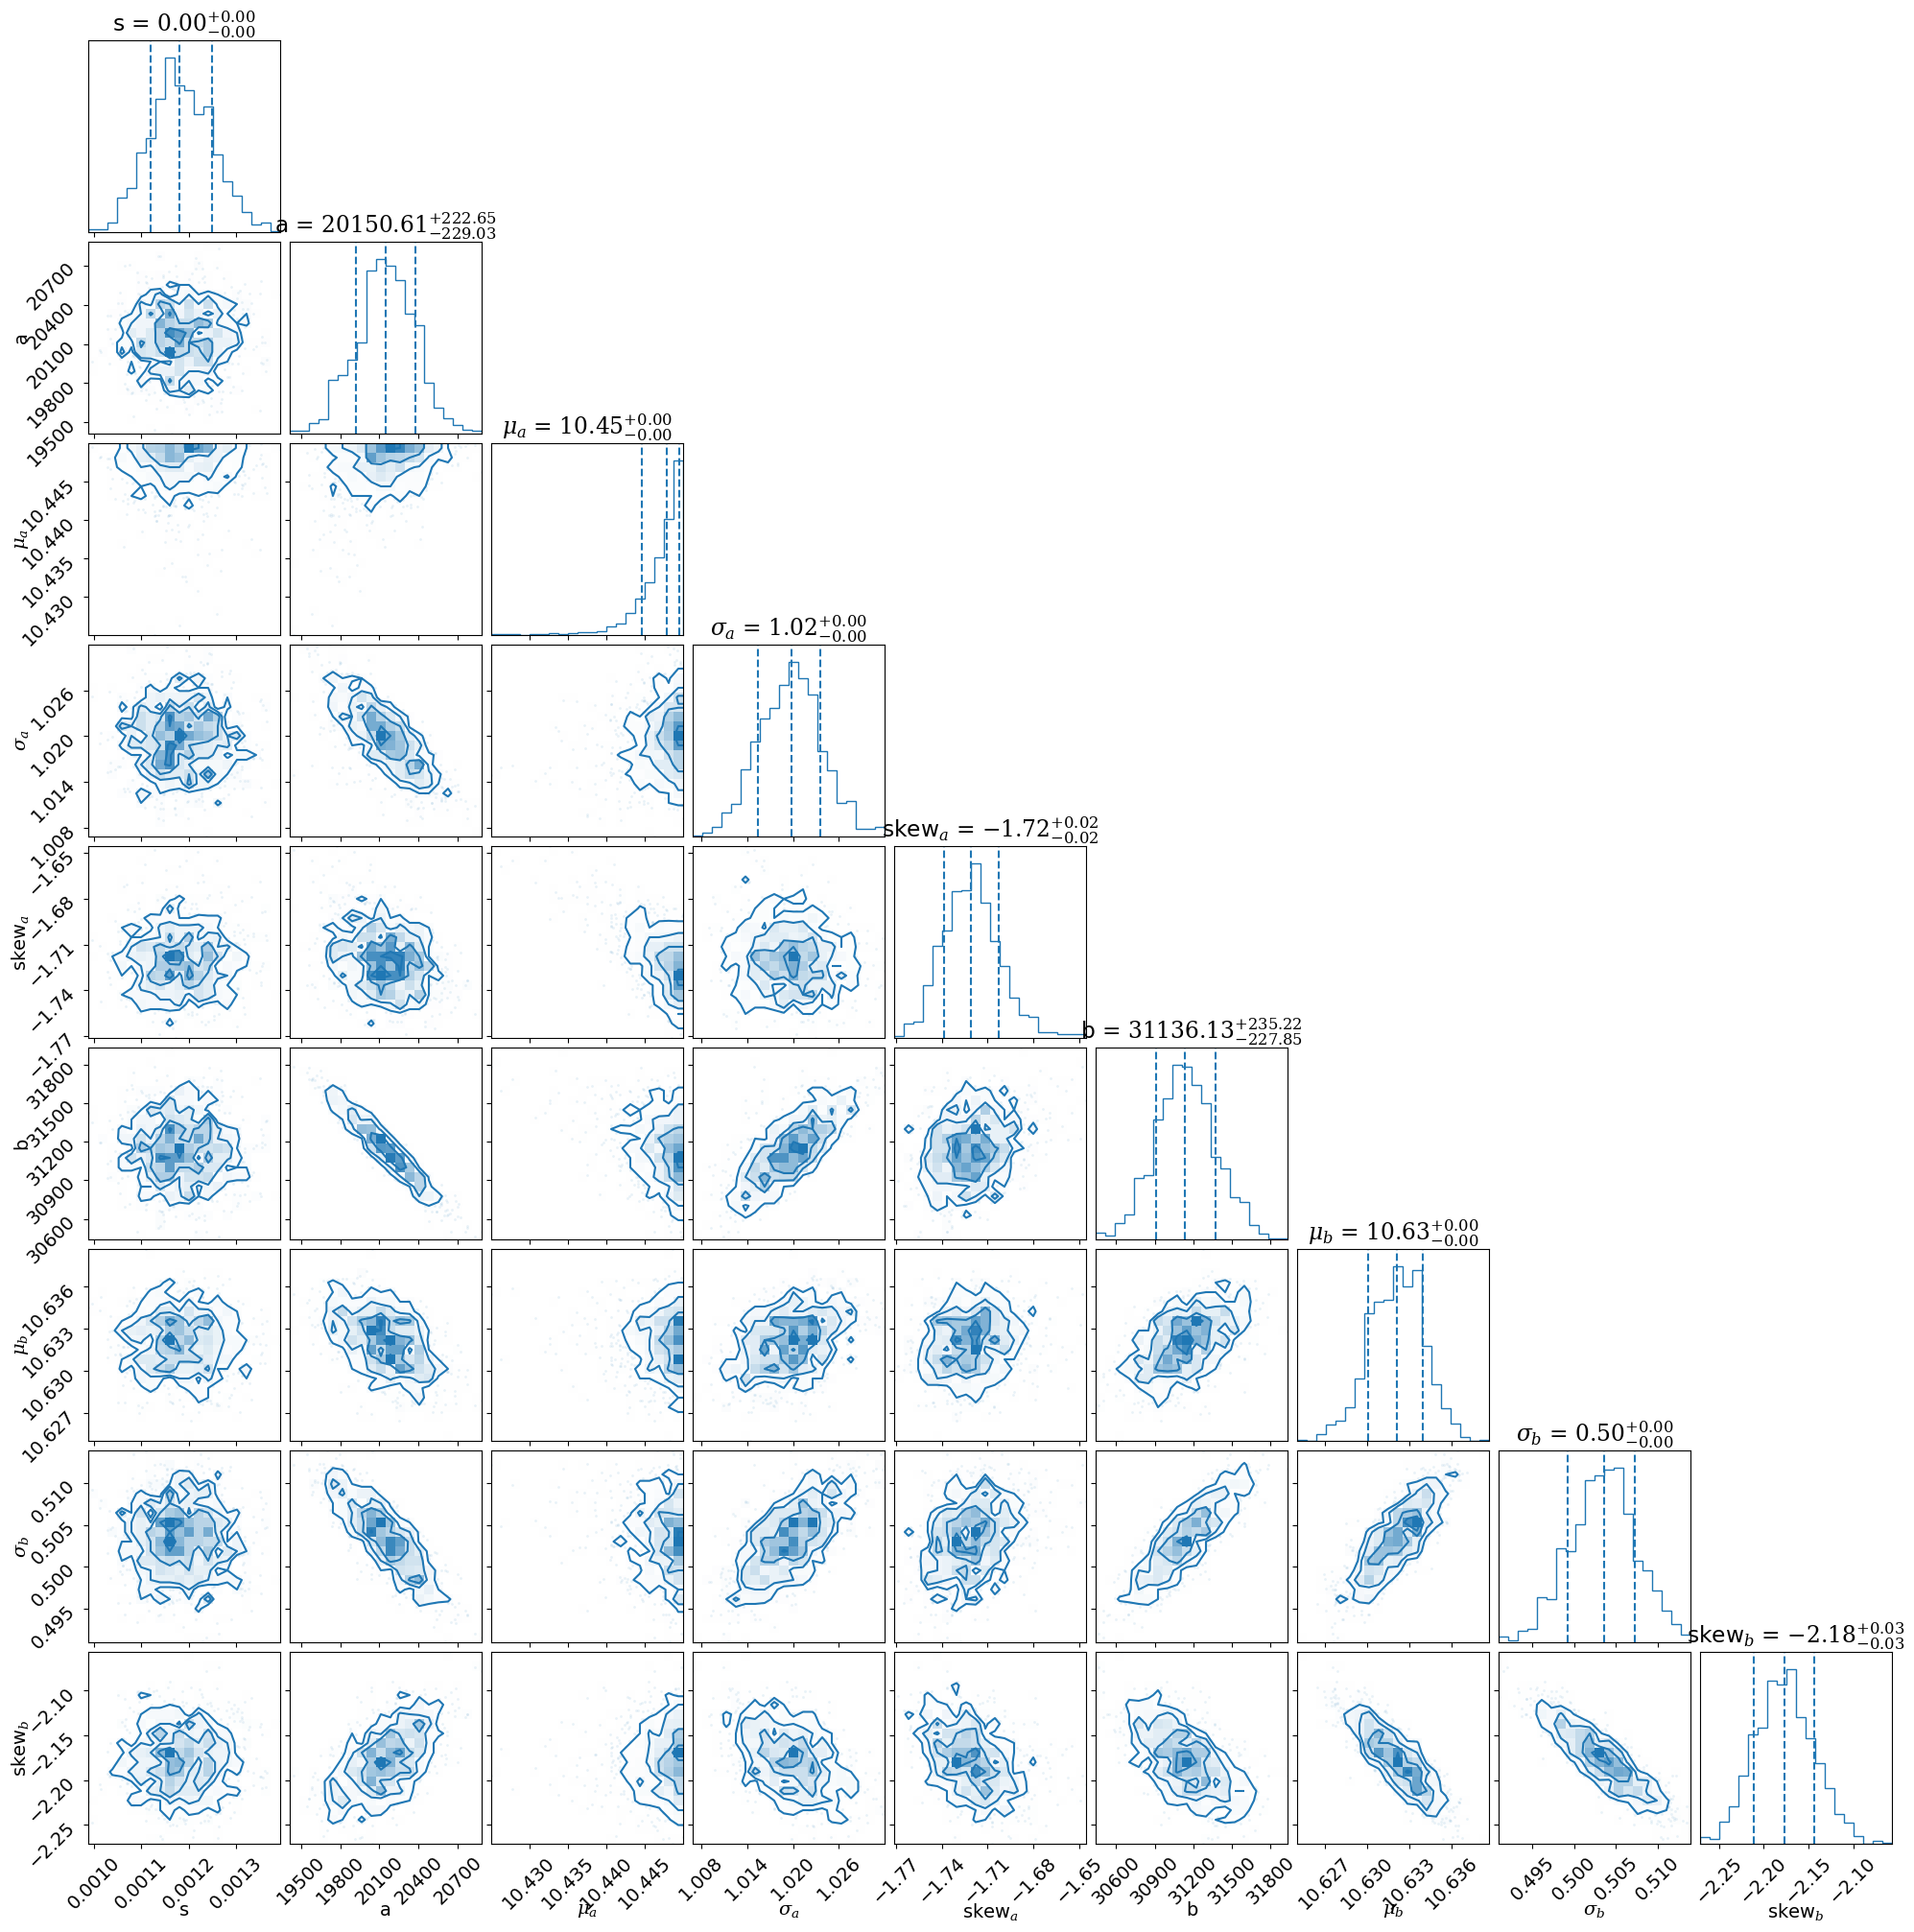

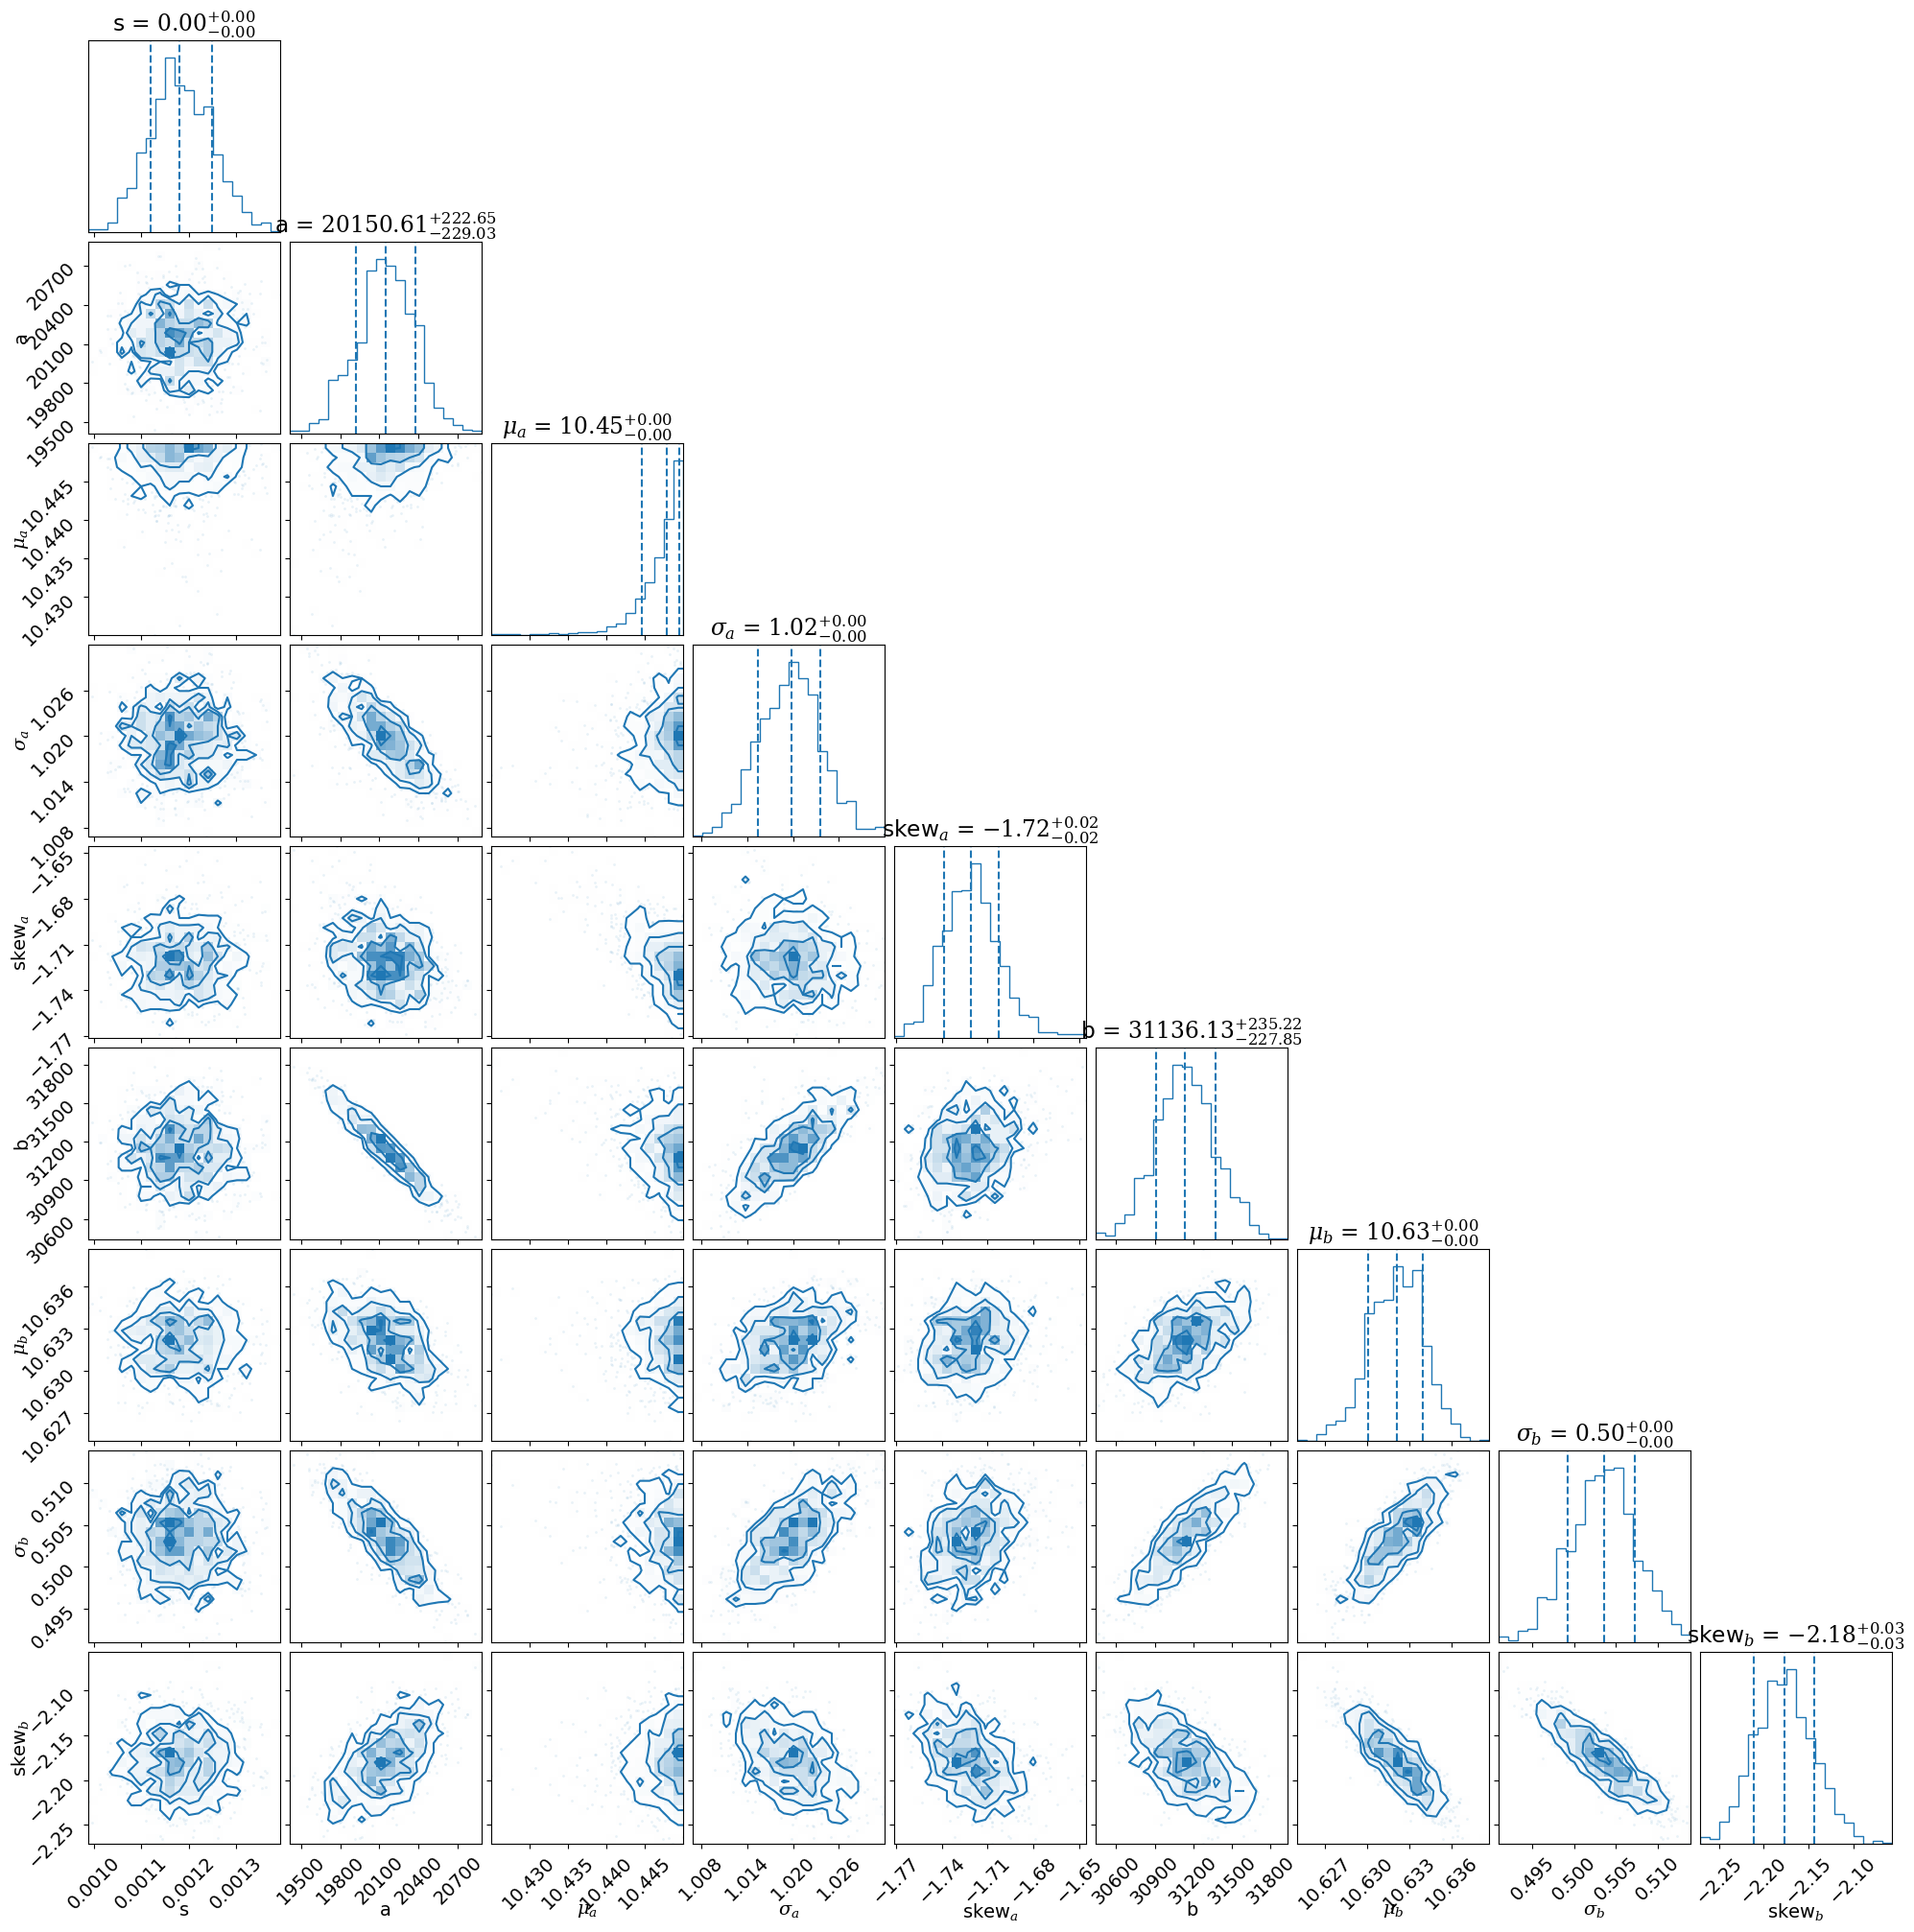

In [31]:
pc.plotting.corner(results1, 
                   labels=labels1_bi, 
                   dims=range(len(labels1_bi)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [32]:
lnzM1 = results1['logz'][-1]
lnzM1

-568.9137619817449

In [33]:
bestfit1 = np.mean(results1['samples'], axis=0)
bestfit1

array([ 1.1842662e-03,  2.0148086e+04,  1.0446988e+01,  1.0196395e+00,
       -1.7202914e+00,  3.1138631e+04,  1.0632087e+01,  5.0342745e-01,
       -2.1769314e+00], dtype=float32)

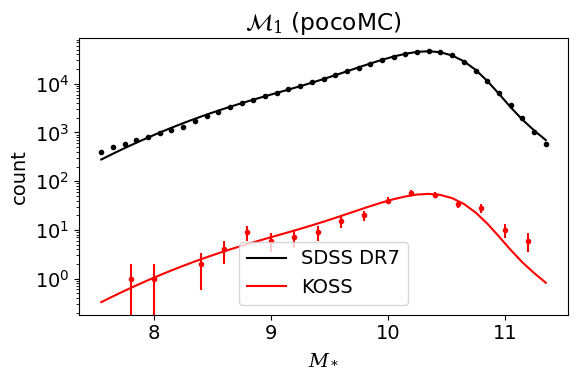

In [34]:
Model_1_plot(bestfit1, 
             Mstar_SDSS, 
             Mstar_Kirshner, 
             SDSS_bins, 
             Kirshner_bins, 
             2, 
             xlabel_text='$M_*$', 
             title_text=r'$\mathcal{M}_1$ (pocoMC)')

## 2-parent model

In [68]:
temp_infile = open('pocoMC_results/sampler_results_Mstar_M2.pickle', 'rb')
results2 = pickle.load(temp_infile)
temp_infile.close()

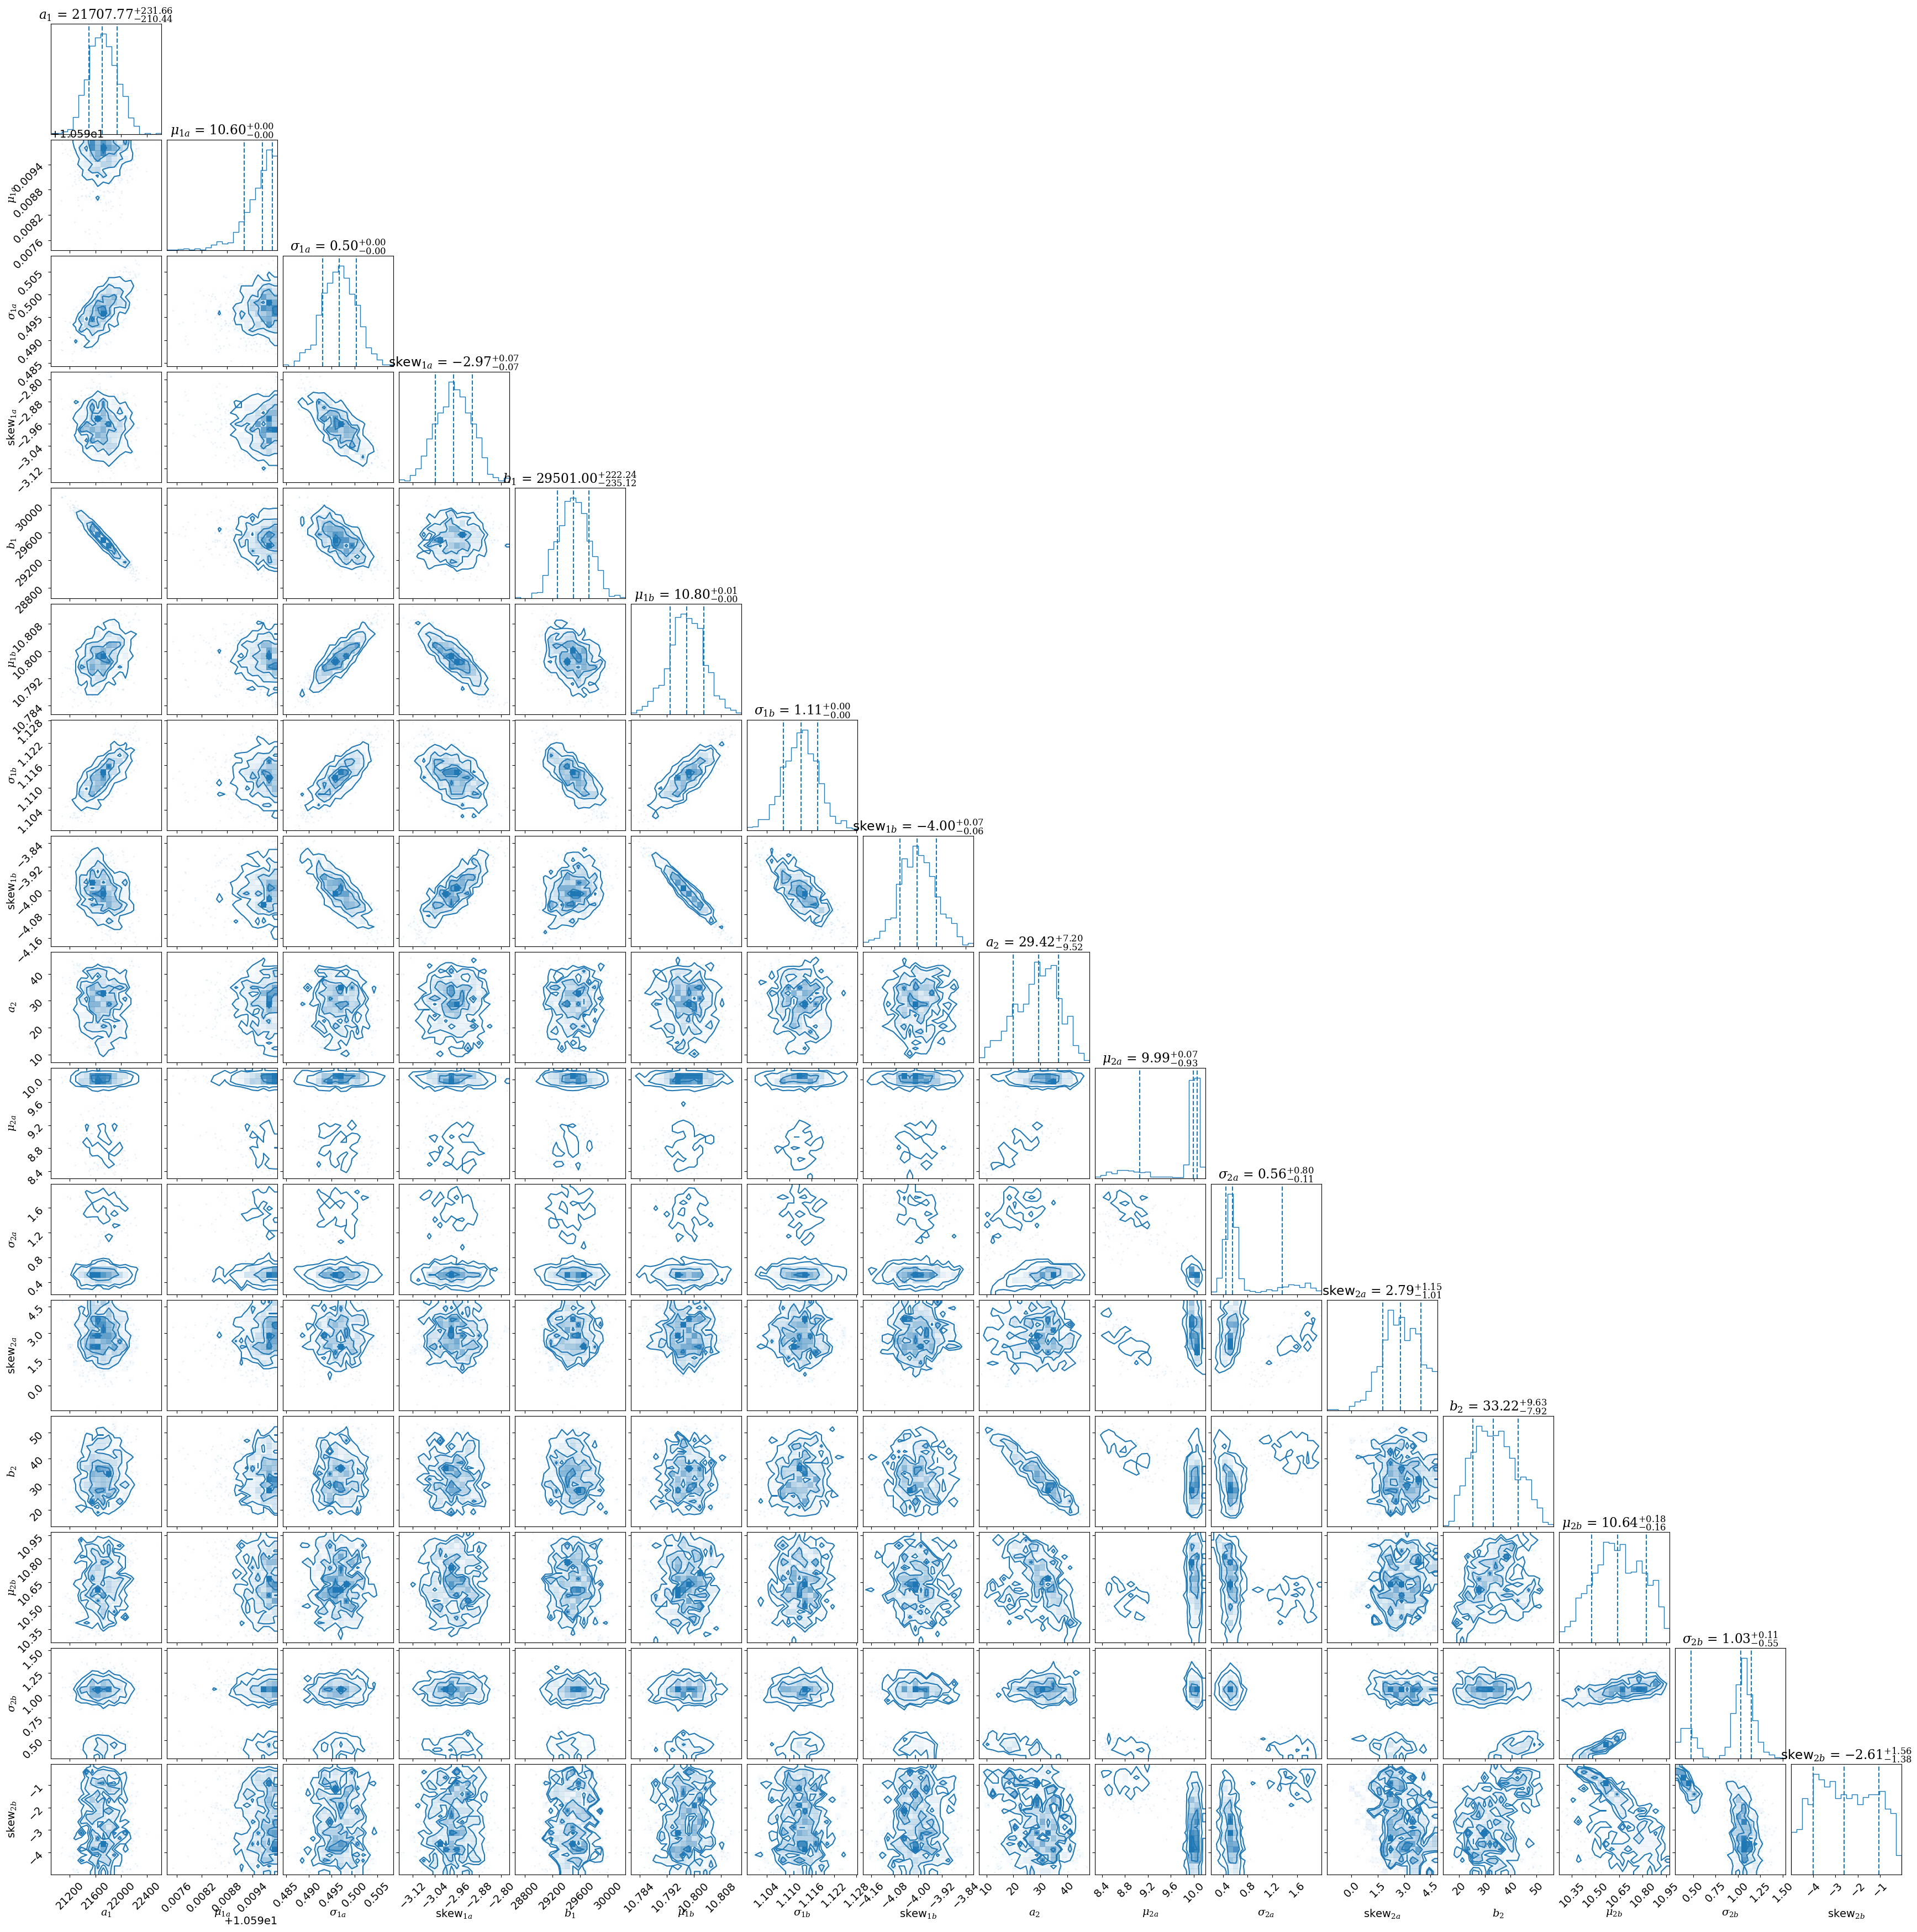

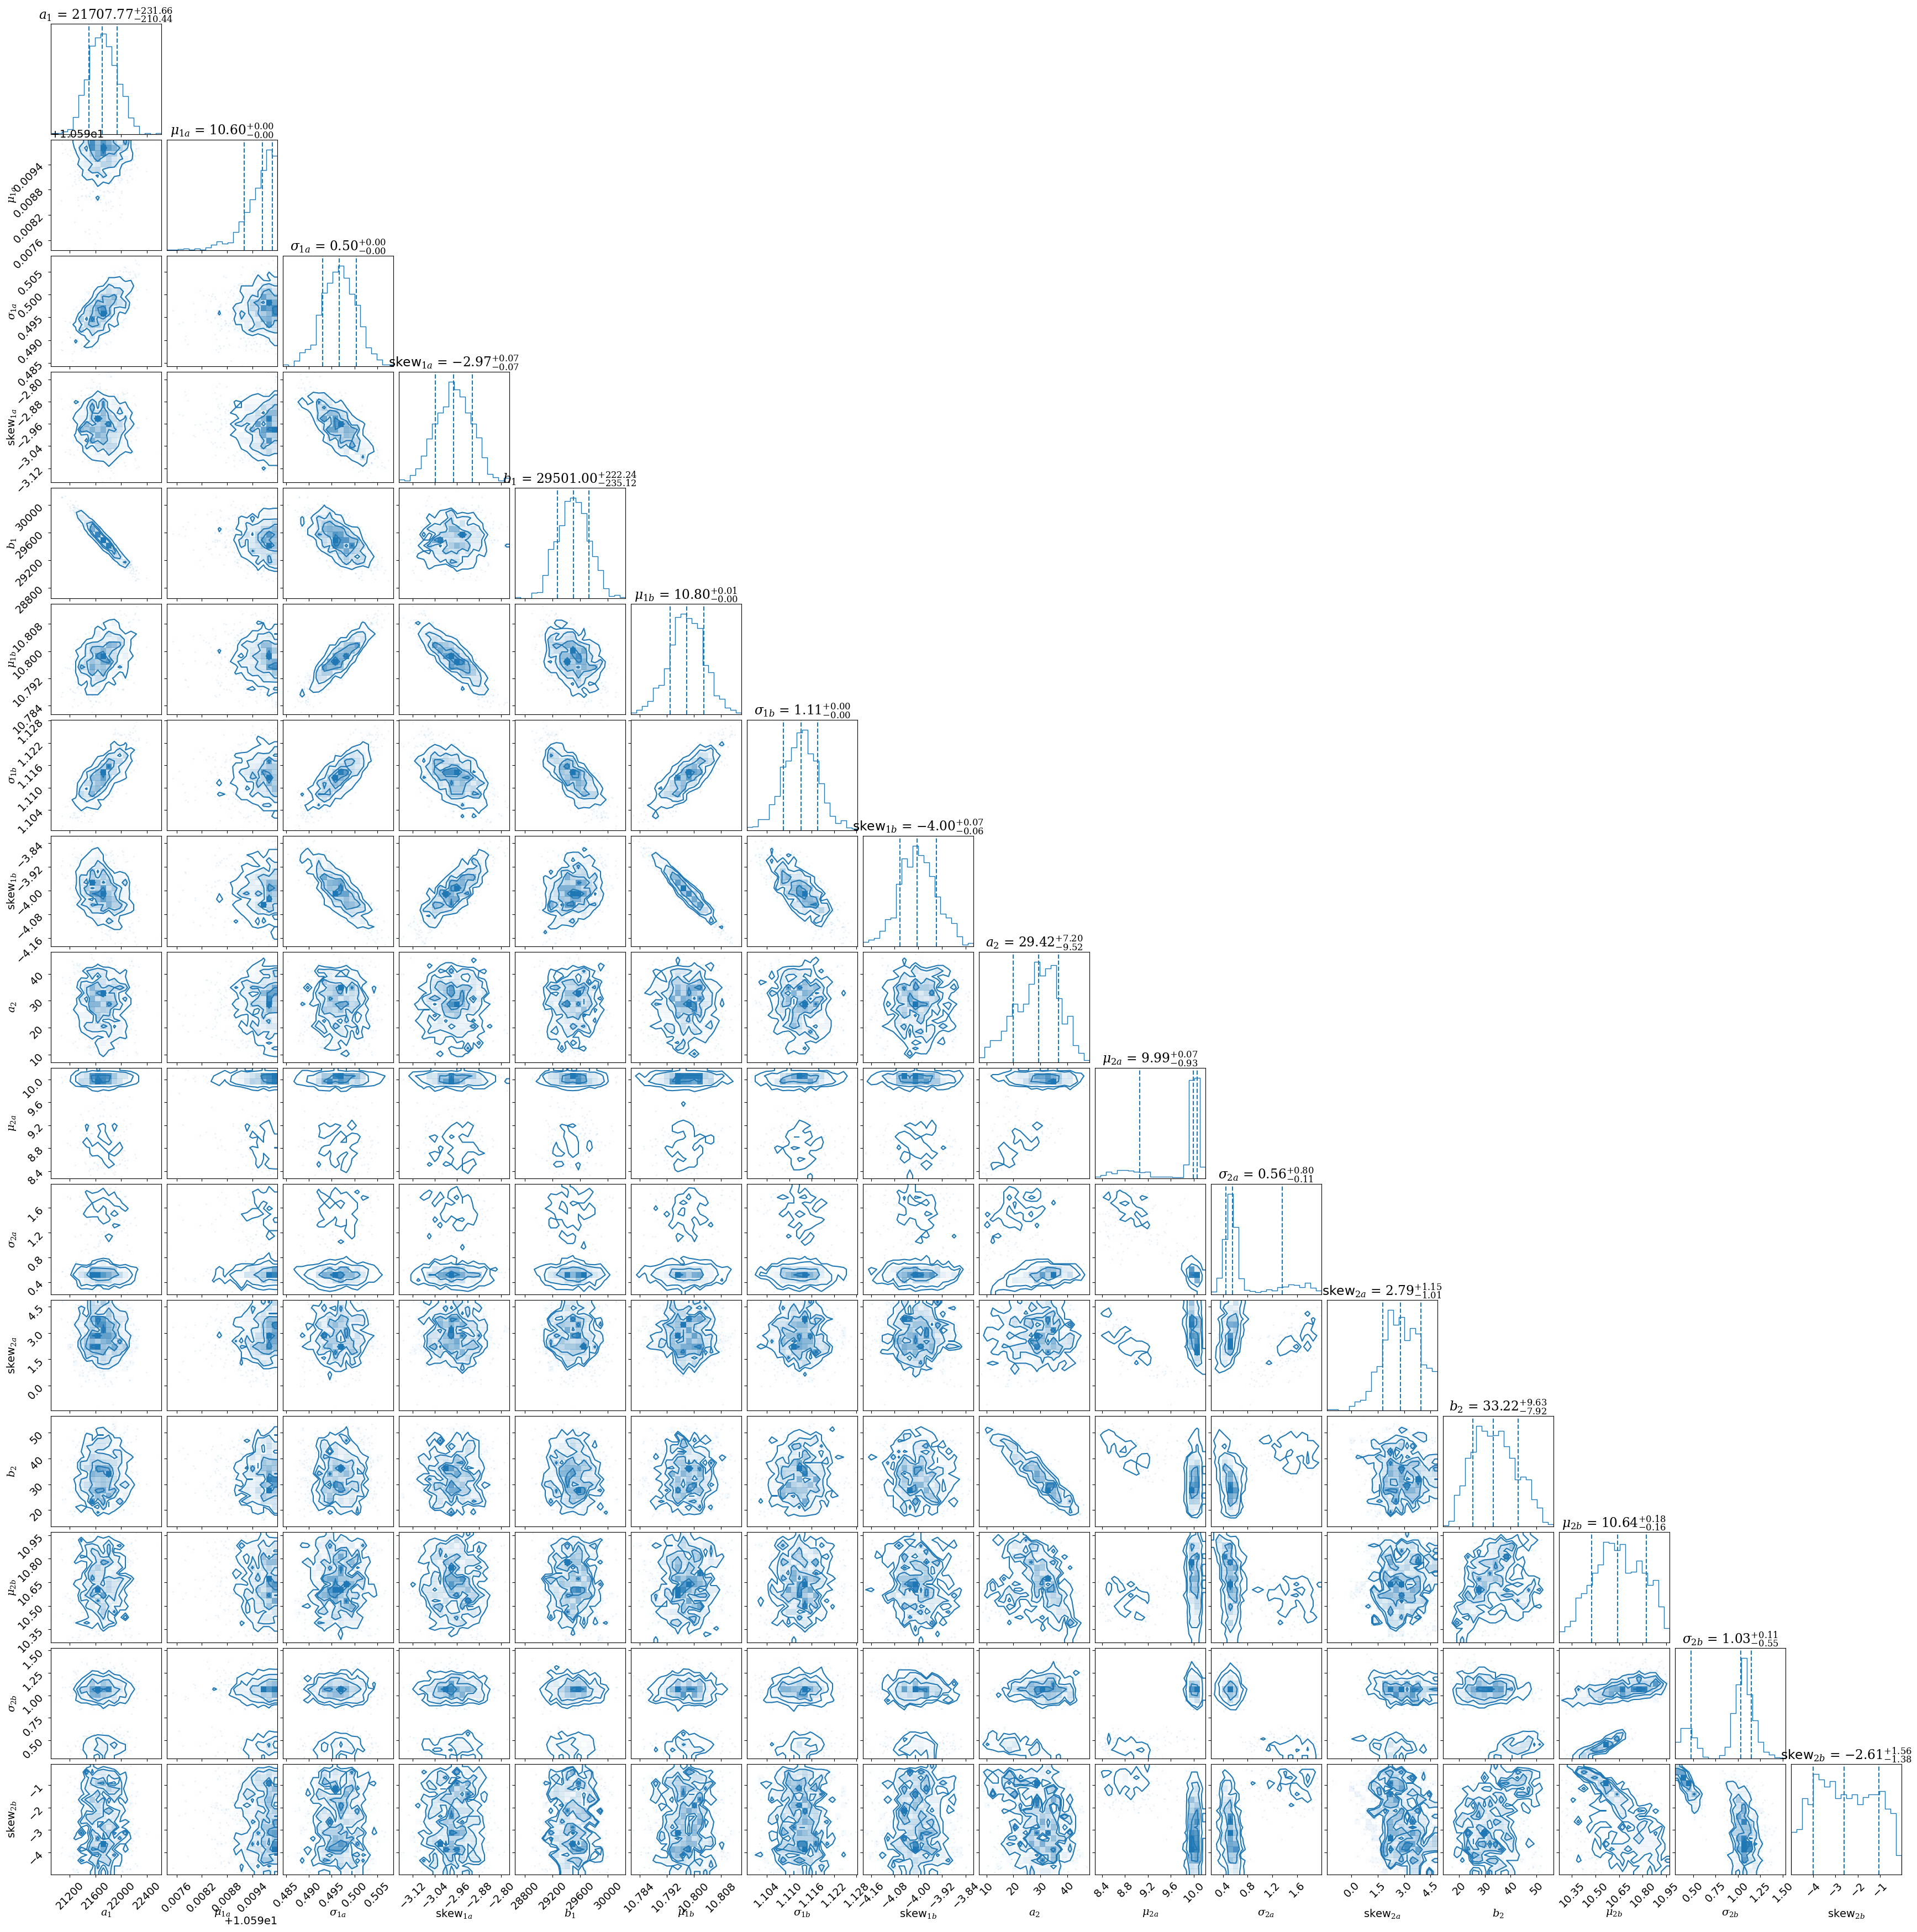

In [69]:
pc.plotting.corner(results2, 
                   labels=labels2_bi, 
                   dims=range(len(labels2_bi)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [70]:
lnzM2 = results2['logz'][-1]
lnzM2

-437.47518404257767

In [71]:
bestfit2 = np.mean(results2['samples'], axis=0)
bestfit2

array([ 2.17135918e+04,  1.05995245e+01,  4.96654749e-01, -2.97090626e+00,
        2.94994492e+04,  1.07978525e+01,  1.11303234e+00, -4.00177240e+00,
        2.87206573e+01,  9.75960159e+00,  7.45135546e-01,  2.82480145e+00,
        3.37431717e+01,  1.06433754e+01,  9.27883685e-01, -2.57116485e+00],
      dtype=float32)

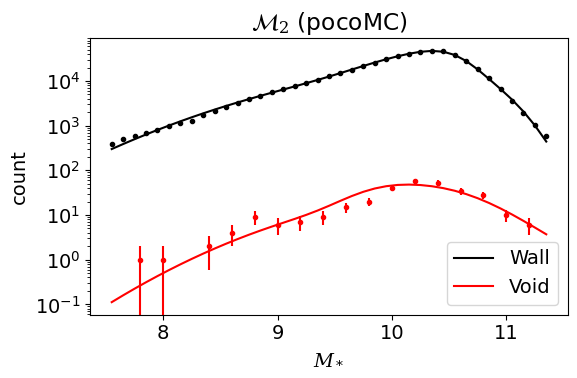

In [72]:
Model_2_plot(bestfit2, 
             Mstar_SDSS, 
             Mstar_Kirshner, 
             SDSS_bins, 
             Kirshner_bins, 
             [2, 2], 
             xlabel_text='$M_*$', 
             title_text=r'$\mathcal{M}_2$ (pocoMC)')

# Calculate Bayes factor

In [73]:
lnB12 = lnzM1 - lnzM2

B12 = np.exp(lnB12)

print('Mstar: B12 = {:.3g}; log(B12) = {:.3f}'.format(B12, lnB12*np.log10(np.exp(1))))

Mstar: B12 = 8.26e-58; log(B12) = -57.083
